# **Weather data outlier detection**

In [81]:
import pandas as pd               #Өгөгдөлтэй ажиллах функц
import seaborn as sns             #Өгөгдлийг дүрсэлж гаргах функц
import matplotlib.pyplot as plt   #Өгөгдлийг дүрсэлж гаргах функц
import numpy as np                #Тоон өгөгдөлтэй ажиллах функц

In [82]:
humid = pd.read_csv('/home/barkowich/Documents/anaconda/ml/weather/21h.csv')
press = pd.read_csv('/home/barkowich/Documents/anaconda/ml/weather/21p.csv')
tempr = pd.read_csv('/home/barkowich/Documents/anaconda/ml/weather/21t.csv')

In [83]:
merged = humid
merged = merged.join(press, lsuffix="_left")          #тус бүрийн багануудыг нэгтгэнэ
merged = merged.join(tempr, lsuffix="_left" )
merged.shape                                          #Өгөгдлийн хэлбэр хэмжээг үзүүлнэ

(192718, 3)

In [84]:
merged.columns = ["Humidity", "Pressure", "Temperature"]      #Баганы нэрийг солих үйлдэл
merged.head()

,Humidity,Pressure,Temperature
0,0.742,1037.400000,-33.0
1,0.742,1037.033333,-33.0
2,0.668,1036.666667,-34.0
3,0.742,1036.300000,-33.0
4,0.673,1035.933333,-32.0


In [85]:
df = pd.DataFrame()
df['Timestamp'] = pd.DataFrame(pd.date_range(start="2010-01-01", end="2020-12-31", freq='30T'))
merged = merged.join(df, how = 'left')
merged.head()

,Humidity,Pressure,Temperature,Timestamp
0,0.742,1037.400000,-33.0,2010-01-01 00:00:00
1,0.742,1037.033333,-33.0,2010-01-01 00:30:00
2,0.668,1036.666667,-34.0,2010-01-01 01:00:00
3,0.742,1036.300000,-33.0,2010-01-01 01:30:00
4,0.673,1035.933333,-32.0,2010-01-01 02:00:00


## **Plotting datasets**

In [86]:
# Data Plot  
    
def plotvariable(df, variable):
    plt.figure(figsize=(16,4))
    #histogram
    plt.subplot(1,2,1)
    plt.hist(df[variable],alpha=0.5)

    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(df[variable])
    plt.show()

In [87]:
from scipy.stats import norm
def plot_bell(data,name_xlabel):
  plt.hist(data, bins=20, rwidth=0.8, density=True)
  plt.xlabel(name_xlabel)
  plt.ylabel('Count')

  rng = np.arange(data.min(), data.max(), 0.1)
  plt.plot(rng, norm.pdf(rng,data.mean(),data.std()))

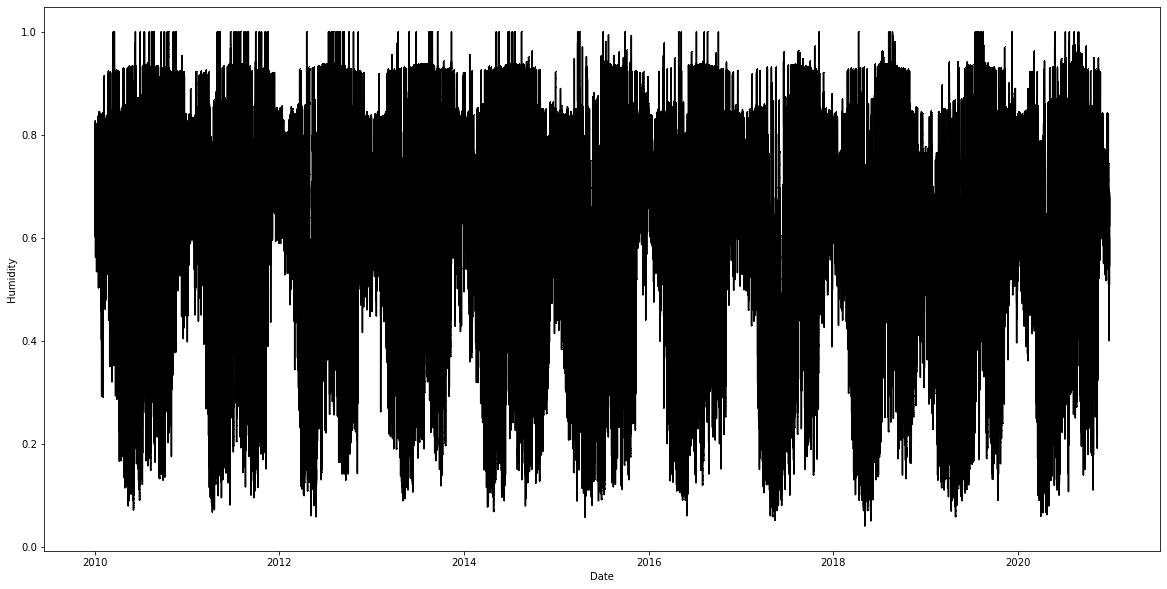

In [88]:
plt.plot(merged['Timestamp'], merged['Humidity'], color='black', marker=',')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

/home/barkowich/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


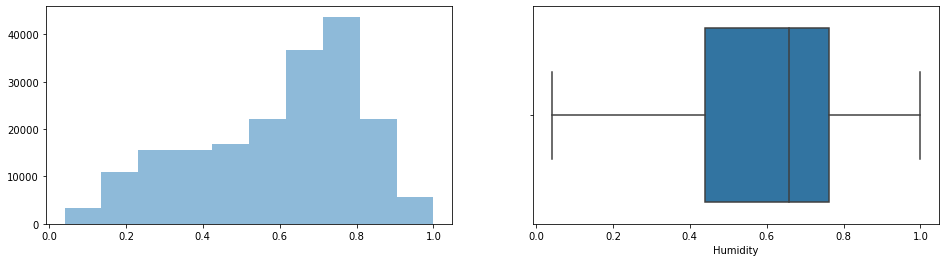

In [89]:
plotvariable(merged,'Humidity')

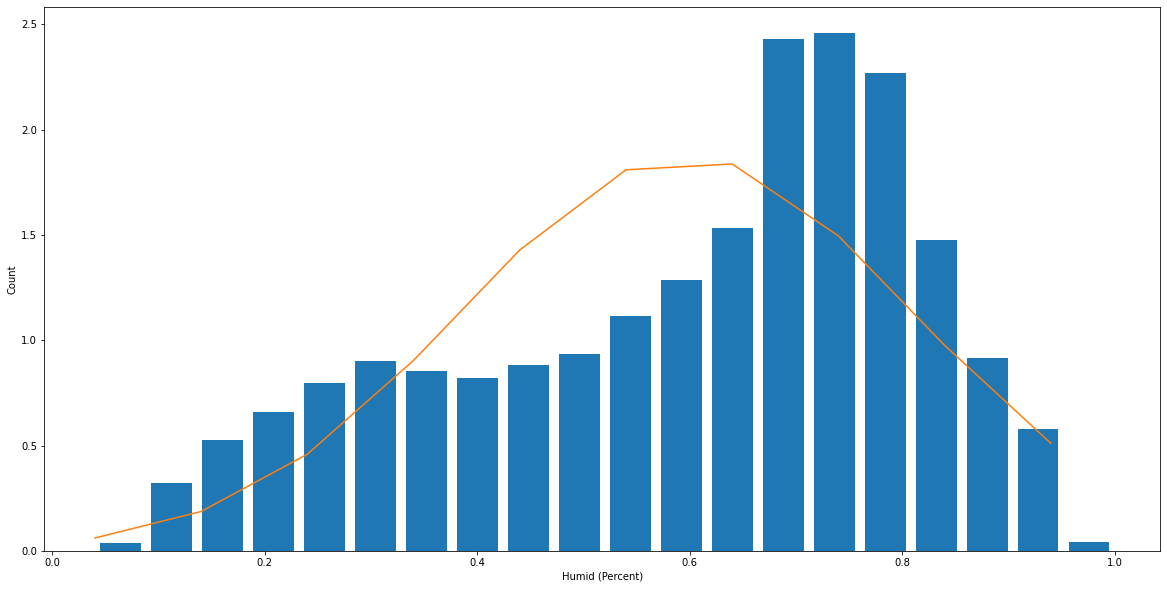

In [90]:
plot_bell(merged.Humidity, 'Humid (Percent)')

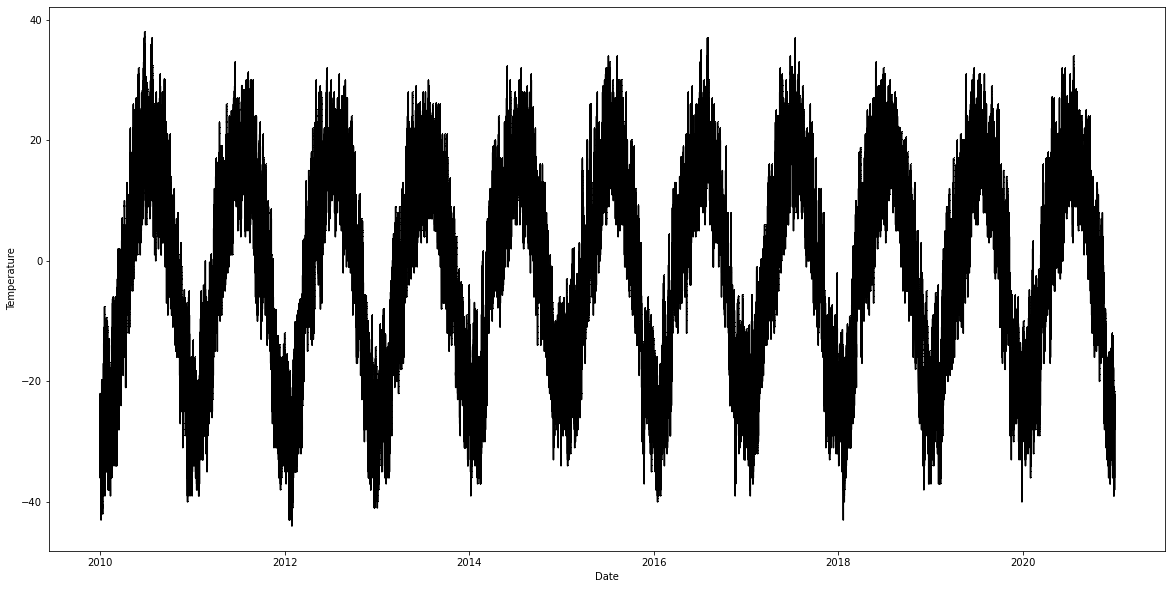

In [91]:
plt.plot(merged['Timestamp'], merged['Temperature'], color='black', marker=',')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

/home/barkowich/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


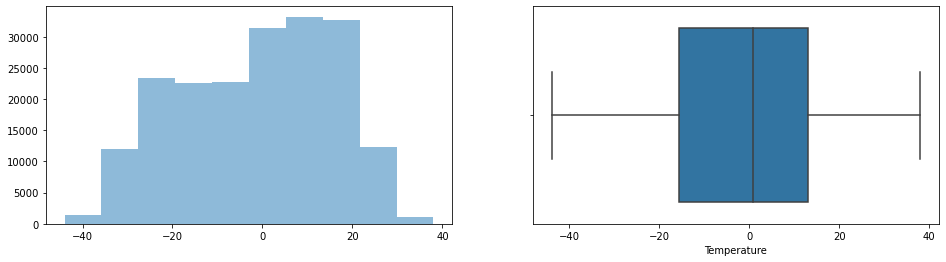

In [92]:
plotvariable(merged,'Temperature')

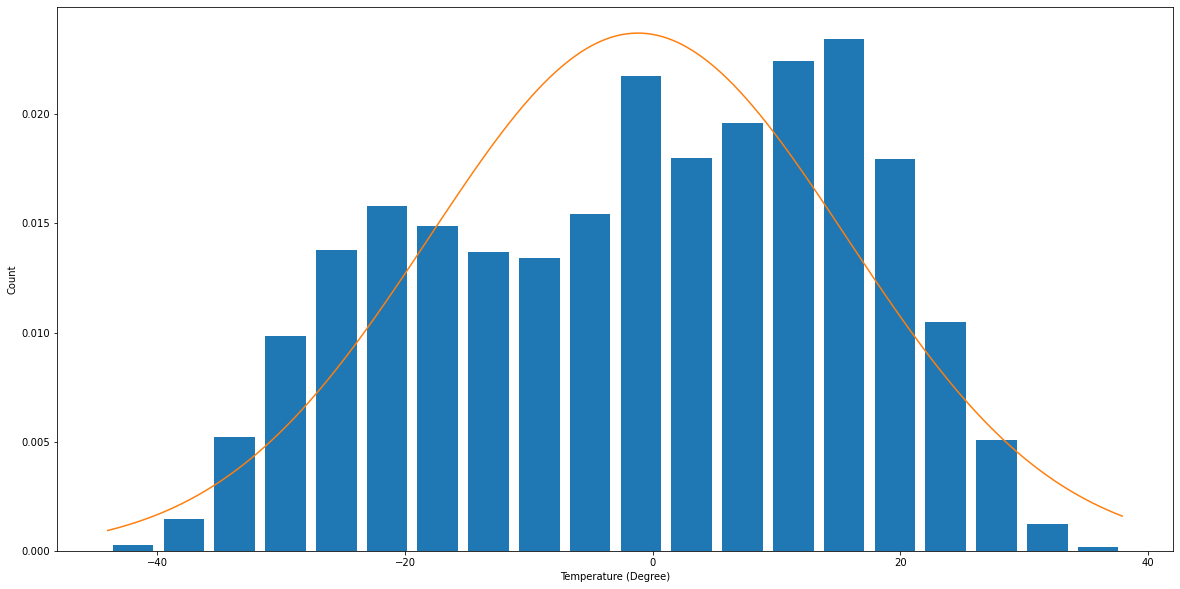

In [93]:
plot_bell(merged.Temperature, 'Temperature (Degree)')

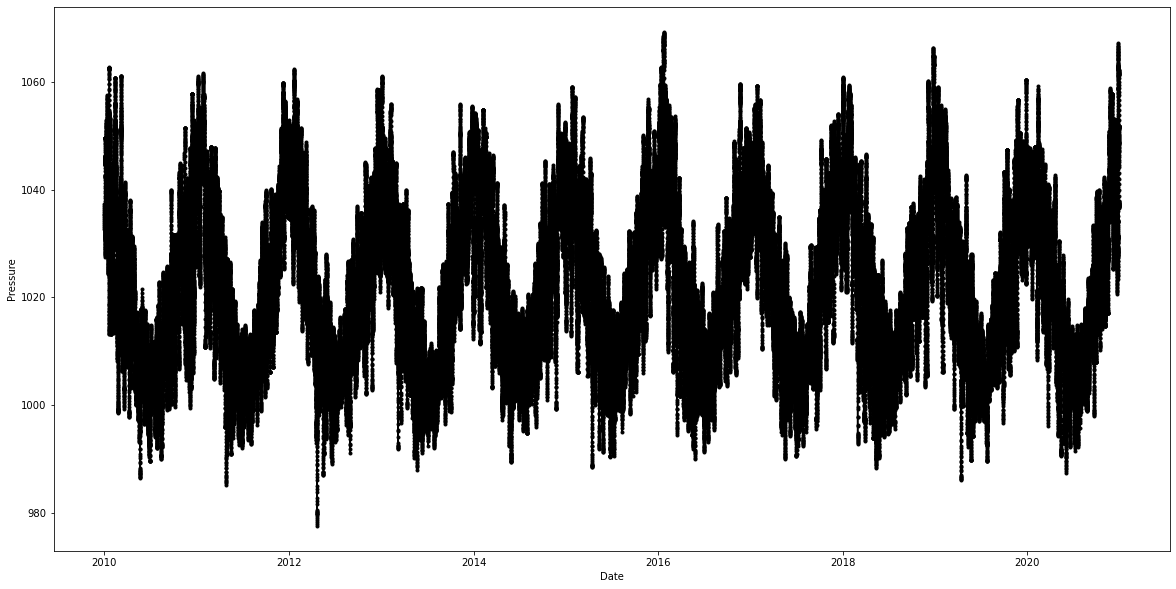

In [94]:
plt.plot(merged['Timestamp'], merged['Pressure'], color='black', marker='.')
plt.xlabel('Date')
plt.ylabel('Pressure')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

/home/barkowich/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


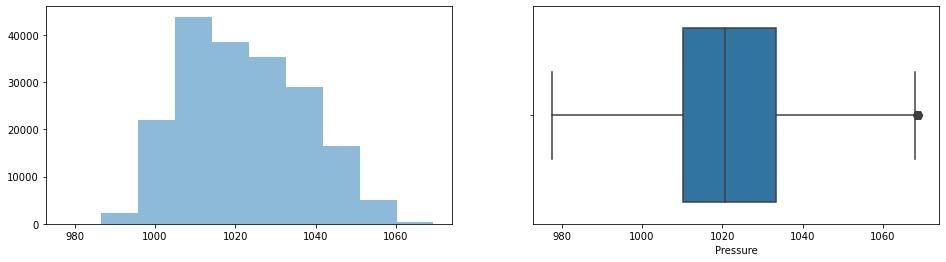

In [95]:
plotvariable(merged,'Pressure')

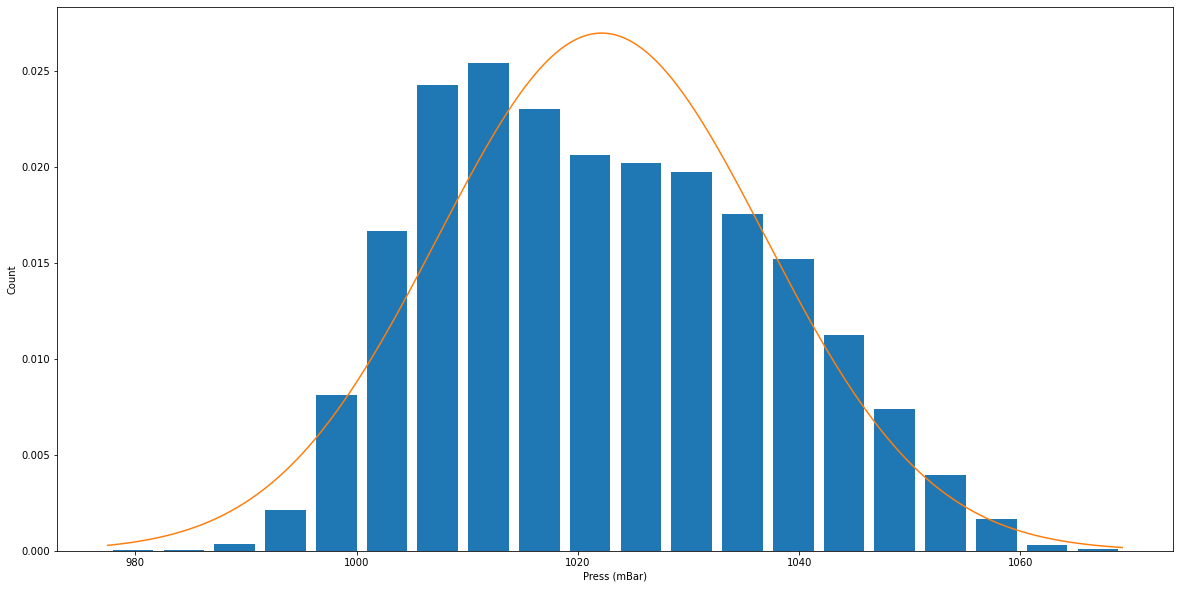

In [96]:
plot_bell(merged.Pressure, "Press (mBar)")

## **Detecting Outliers**

In [97]:
# outlier detection
def standart_division(data, threshhold = 3):
 upper_limit = data.mean() + threshhold * data.std()
 lower_limit = data.mean() - threshhold * data.std()
 return data[(data>upper_limit) | (data<lower_limit)]

In [98]:
## Даралтын утгаас бусад өгөгдлөөс outlier илрээгүй

standart_division(merged.Humidity, 3)

Series([], Name: Humidity, dtype: float64)

In [99]:
standart_division(merged.Pressure).head()

40395      977.500
106183    1066.700
106184    1066.925
106185    1067.150
106186    1067.375
Name: Pressure, dtype: float64

In [100]:
standart_division(merged.Temperature)

Series([], Name: Temperature, dtype: float64)

In [101]:
# Z-score аргаар outliers - ийг илрүүлэх

def z_score(data, name,threshhold=3):
  data_zscore = pd.DataFrame()
  data_zscore['Data'] = data
  data_zscore['zscore'] = ( data_zscore.Data - data_zscore.Data.mean() ) / data_zscore.Data.std()
  return data_zscore[(data_zscore.zscore < -threshhold) | (data_zscore.zscore > threshhold)]

In [102]:
z_score(merged.Humidity, 'Humidity',3)

,Data,zscore


In [103]:
raw_dat = z_score(merged.Pressure, 'Pressure') 
# Зөвхөн даралтын утгаас outliers илэрсэн

In [104]:
z_score(merged.Temperature, 'Temperature')

,Data,zscore


In [105]:
raw_dat['outlier'] = 1
merged = merged.join(raw_dat.outlier).fillna(0)
merged[merged['outlier']==1].sum()

/tmp/ipykernel_27967/1020422727.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged[merged['outlier']==1].sum()


Humidity          30.235500
Pressure       51160.166667
Temperature    -1493.400000
outlier           48.000000
dtype: float64

## **Random Forest Classifier**

In [106]:
data = pd.DataFrame()
data = merged
#data['humid_zscore'] = ( data.Humidity - data.Humidity.mean() ) / data.Humidity.std()
#data['tempr_zscore'] = ( data.Temperature - data.Temperature.mean() ) / data.Temperature.std()
#data['press_zscore'] = ( data.Pressure - data.Pressure.mean() ) / data.Pressure.std()
data = data[['Humidity','Temperature','Pressure','outlier']]

In [107]:
data

,Humidity,Temperature,Pressure,outlier
0,0.742,-33.0,1037.400000,0.0
1,0.742,-33.0,1037.033333,0.0
2,0.668,-34.0,1036.666667,0.0
3,0.742,-33.0,1036.300000,0.0
4,0.673,-32.0,1035.933333,0.0
...,...,...,...,...
192713,0.688,-26.0,1037.500000,0.0
192714,0.686,-27.0,1037.350000,0.0
192715,0.623,-27.0,1037.200000,0.0
192716,0.683,-28.0,1037.050000,0.0


### Random forest tree

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

### Train Test Split

In [109]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=41)

## **Fit the Model**

In [110]:
randomforest = RandomForestClassifier(n_estimators = 5,criterion = "entropy", random_state = 0)
randomforest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

### **Test Model**

In [111]:
y_pred = randomforest.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [112]:
accuracy_score(Y_test, y_pred)

0.9999654074996541

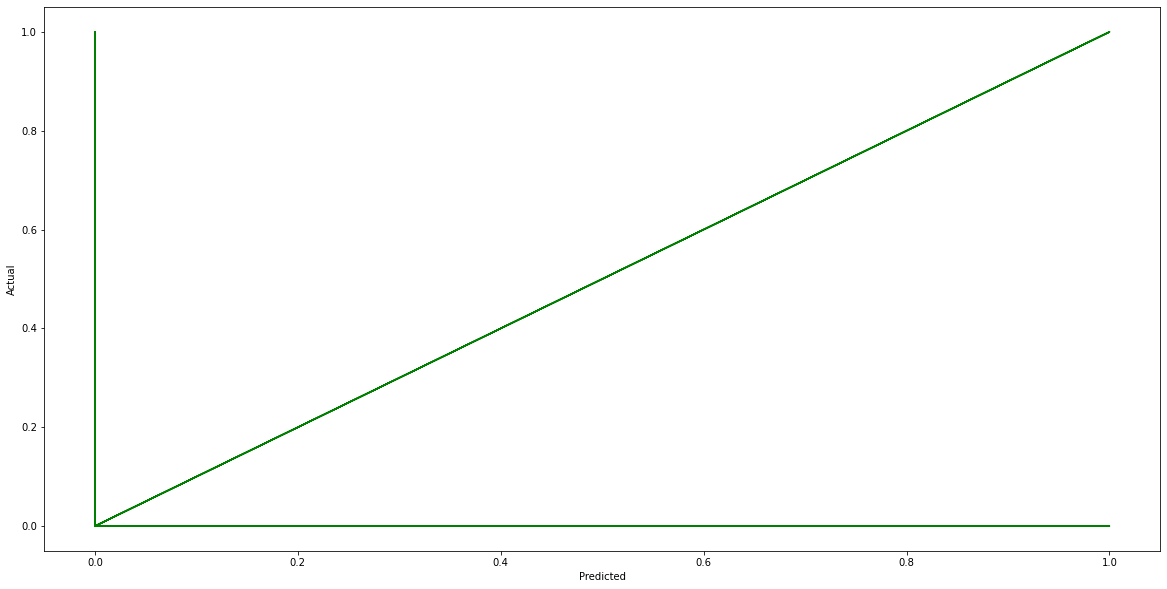

In [113]:
plt.plot(Y_test, y_pred, color = 'green', marker = ',')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [114]:
Y_test.sum()

12.0

In [115]:
y_pred.sum()

12.0

In [116]:
Y_test.shape

(57816,)

In [117]:
y_pred.shape

(57816,)

In [118]:
all_ds = pd.DataFrame()
all_in_one = data.iloc[:, :-1].values


dataset = data.iloc[:, :-1]
dataset['outlier'] =  randomforest.predict(all_in_one)

In [119]:
dataset.outlier.sum()

48.0

In [120]:
dataset['Timestamp'] = merged.Timestamp

In [121]:
dataset.head()

,Humidity,Temperature,Pressure,outlier,Timestamp
0,0.742,-33.0,1037.400000,0.0,2010-01-01 00:00:00
1,0.742,-33.0,1037.033333,0.0,2010-01-01 00:30:00
2,0.668,-34.0,1036.666667,0.0,2010-01-01 01:00:00
3,0.742,-33.0,1036.300000,0.0,2010-01-01 01:30:00
4,0.673,-32.0,1035.933333,0.0,2010-01-01 02:00:00


In [122]:
outlier = pd.DataFrame()
no_outlier = pd.DataFrame()

outlier = dataset[dataset['outlier'] == 1 ]
no_outlier = dataset[dataset['outlier'] == 0]

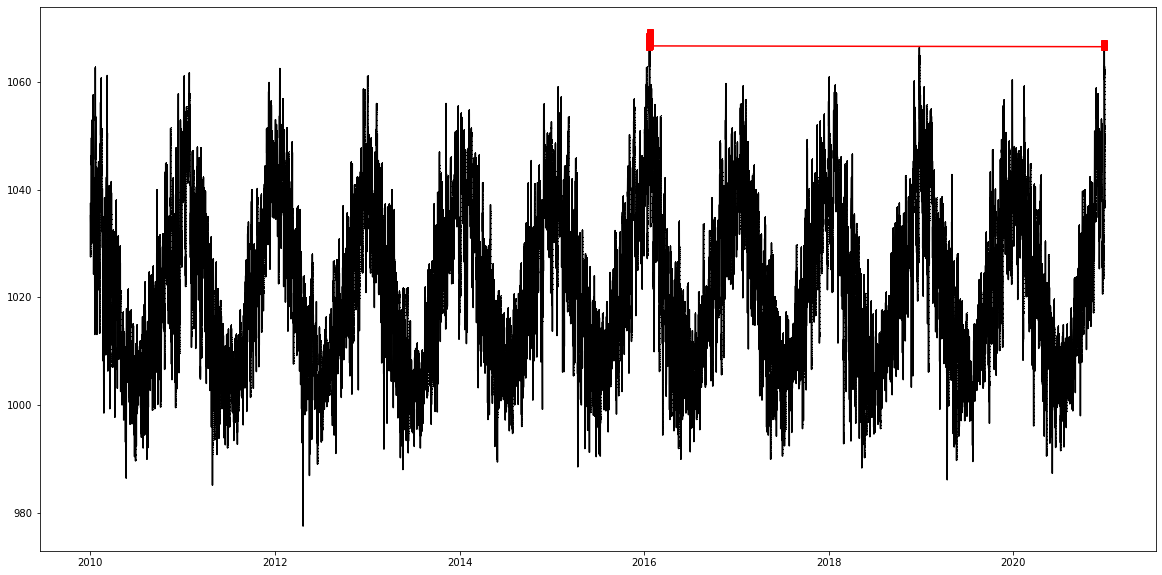

In [129]:
plt.plot(no_outlier['Timestamp'], no_outlier['Pressure'], color = 'black', marker = ',' )
plt.plot(outlier['Timestamp'], outlier['Pressure'], color = 'red', marker = 's')
plt.show()

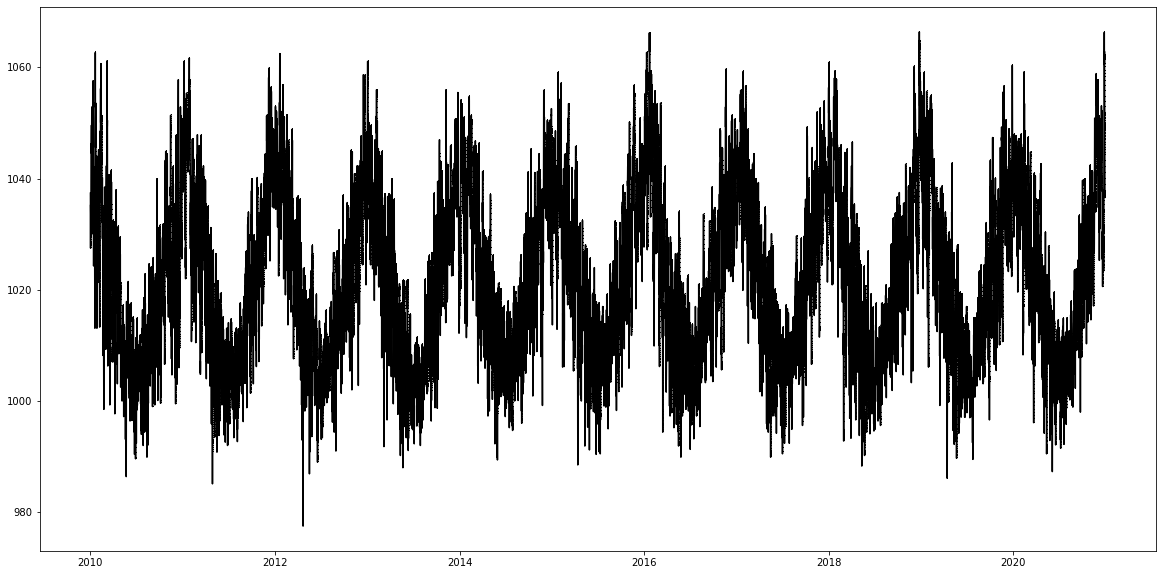

In [124]:
plt.plot(no_outlier['Timestamp'], no_outlier['Pressure'], color = 'black', marker = ',' )
#plt.plot(outlier['Timestamp'], outlier['Pressure'], color = 'red', marker = 'o')
plt.show()

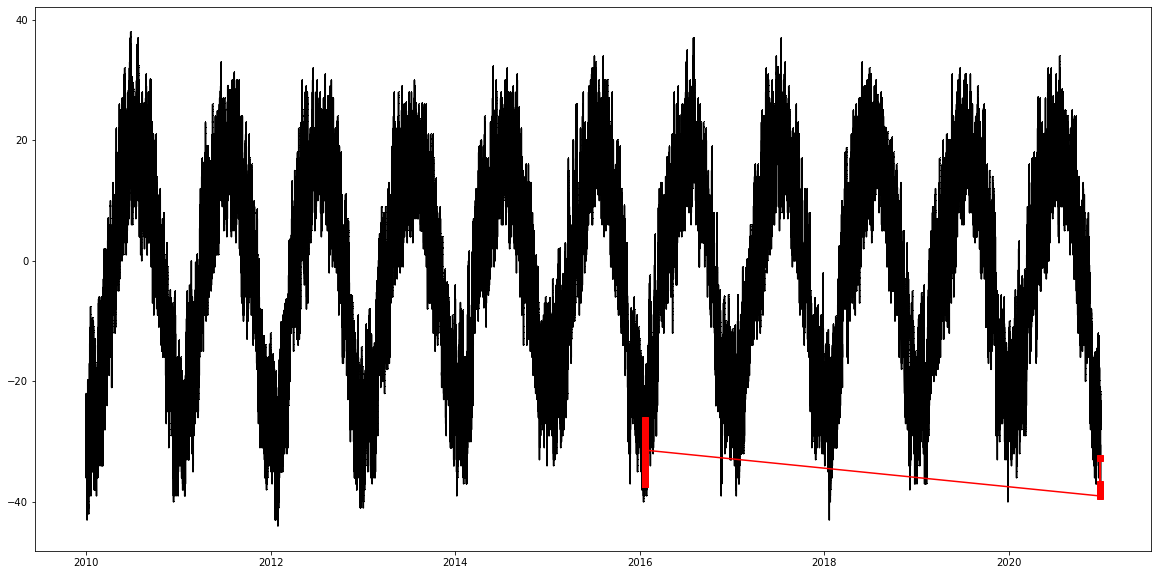

In [130]:
plt.plot(no_outlier['Timestamp'], no_outlier['Temperature'], color = 'black', marker = ',' )
plt.plot(outlier['Timestamp'], outlier['Temperature'], color = 'red', marker = 's')
plt.show()

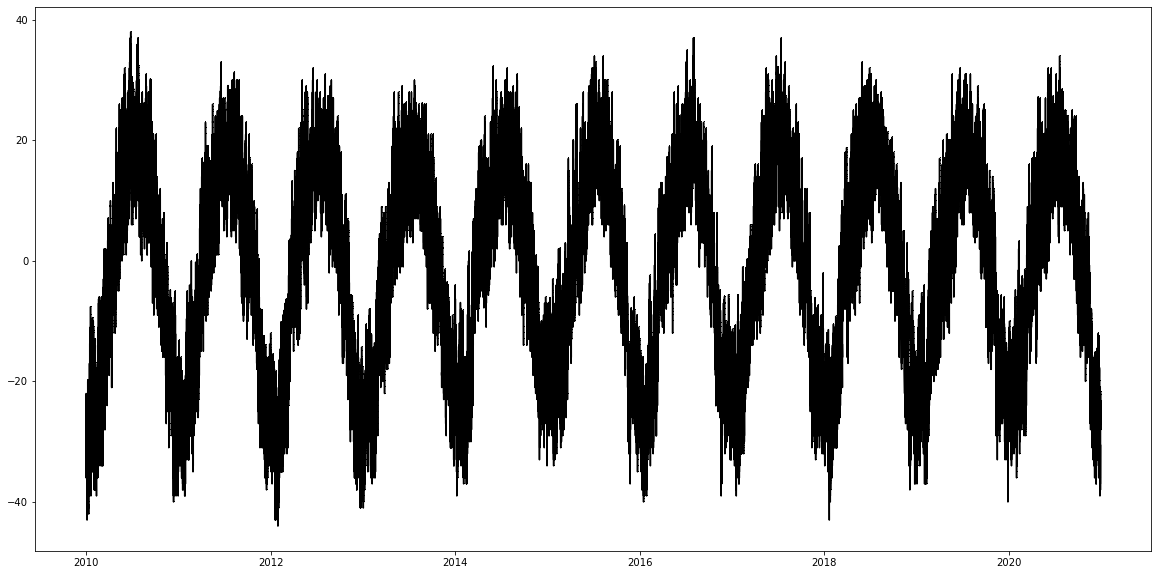

In [126]:
plt.plot(no_outlier['Timestamp'], no_outlier['Temperature'], color = 'black', marker = ',' )
#plt.plot(outlier['Timestamp'], outlier['Temperature'], color = 'red', marker = 'o')
plt.show()

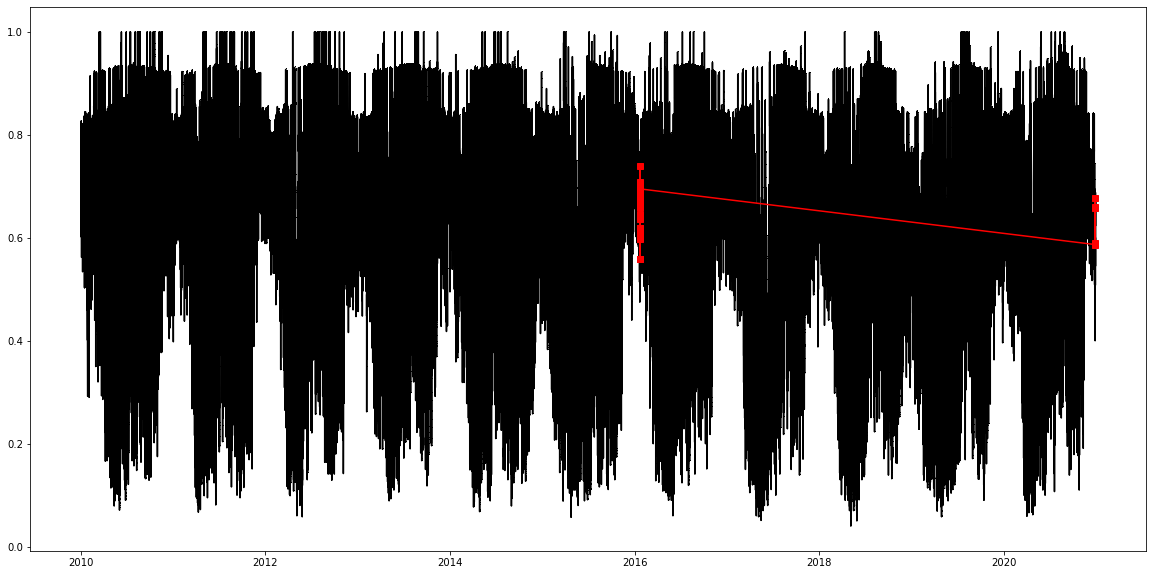

In [139]:
plt.plot(no_outlier['Timestamp'], no_outlier['Humidity'], color = 'black', marker = ',' )
plt.plot(outlier['Timestamp'], outlier['Humidity'], color = 'red', marker = 's')
plt.show()

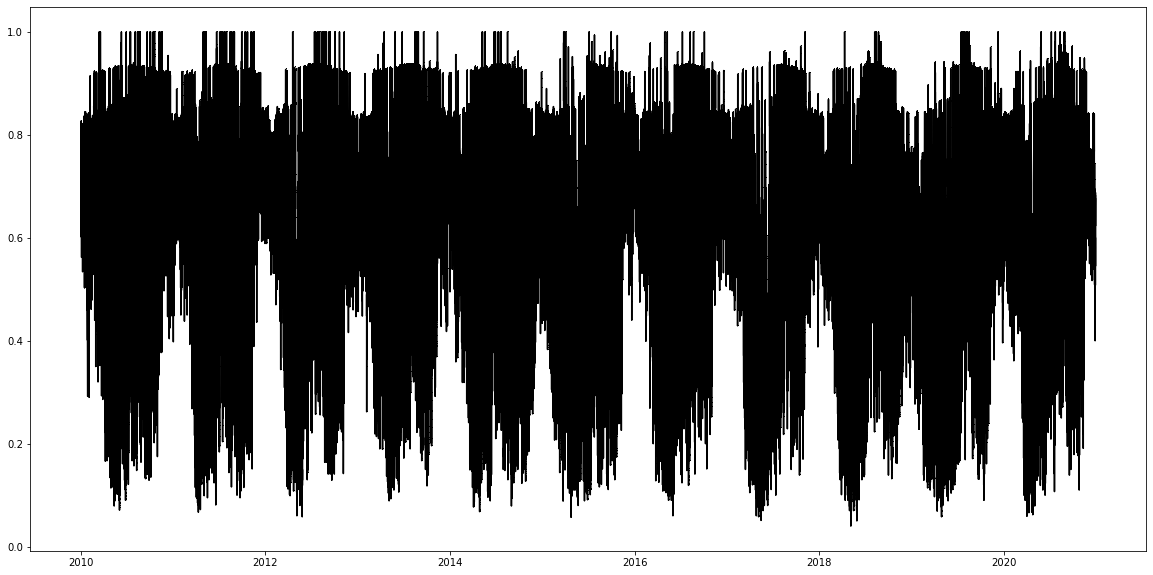

In [128]:
plt.plot(no_outlier['Timestamp'], no_outlier['Humidity'], color = 'black', marker = ',' )
#plt.plot(outlier['Timestamp'], outlier['Humidity'], color = 'red', marker = 'o')
plt.show()

### Confusion Matrix

In [141]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

In [143]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[57803     1]
 [    1    11]]


In [144]:
accuracy_score(Y_test, y_pred)

0.9999654074996541

### **Random Forest using Gini and 7 trees**

In [145]:
randomforest = RandomForestClassifier(n_estimators = 7, criterion = "gini", random_state = 0)
randomforest.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=7, random_state=0)

In [146]:
yy_pred = randomforest.predict(X_test)

In [147]:
accuracy_score(Y_test, yy_pred)

0.9999654074996541

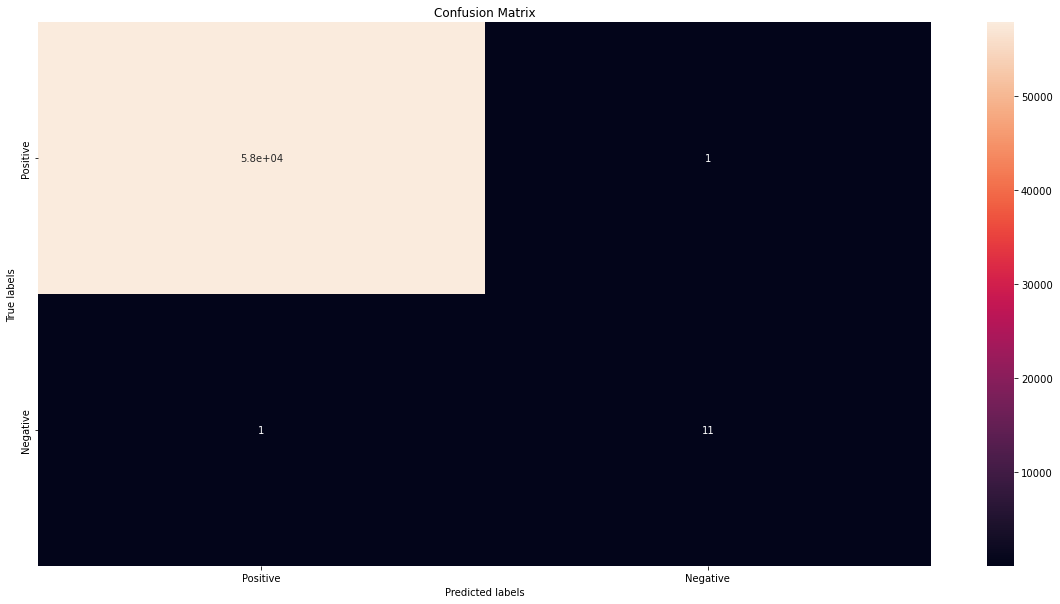

In [149]:
ax= plt.subplot()

cm = confusion_matrix(Y_test, y_pred)

sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);